In [1]:
import os

current_directory = os.getcwd()
project_directory = os.path.abspath(os.path.join(current_directory, os.pardir, os.pardir))
os.chdir(project_directory)


In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA
import pickle


def create_dataset(features_, classes_, idx_to_class):
    df = pd.DataFrame(np.concatenate([features_, classes_.reshape(-1, 1)], axis=1),
                      columns=["feature_1", "feature_2", "class"])
    df["feature_1"] = pd.to_numeric(df["feature_1"])
    df["feature_2"] = pd.to_numeric(df["feature_2"])
    df["class_name"] = df["class"].apply(lambda x: idx_to_class[int(x)])
    top_classes = df["class_name"].value_counts()[:10].index.values
    return df[df["class_name"].isin(top_classes)]

# Получение эмбеддингов resnet для картинок по брендам

In [3]:
with open("data/features/resnet152.pickle", "rb") as f:
    features, classes, class_to_idx = pickle.load(f)

In [4]:
idx_to_class = {v: k for k, v in class_to_idx.items()}
classes_idx = classes[:, 1]

# Сжатие с помощью SVD до двух компонент

/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


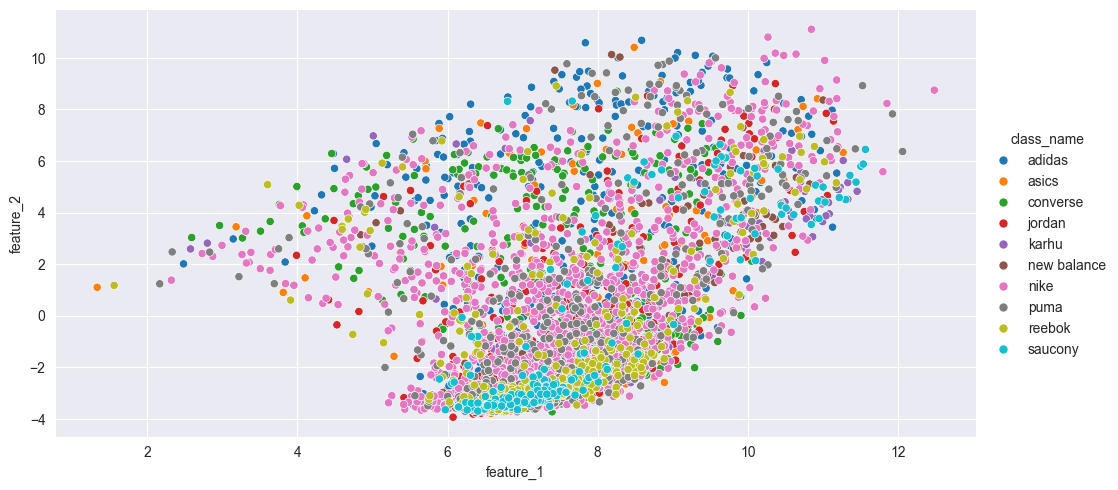

In [5]:
SVD_2 = TruncatedSVD(n_components=2).fit_transform(features)
df = create_dataset(SVD_2, classes_idx, idx_to_class)
sns.relplot(data=df, x="feature_1", y="feature_2", hue="class_name", aspect=2)

# Сжатие с помощью PCA до двух компонент

/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


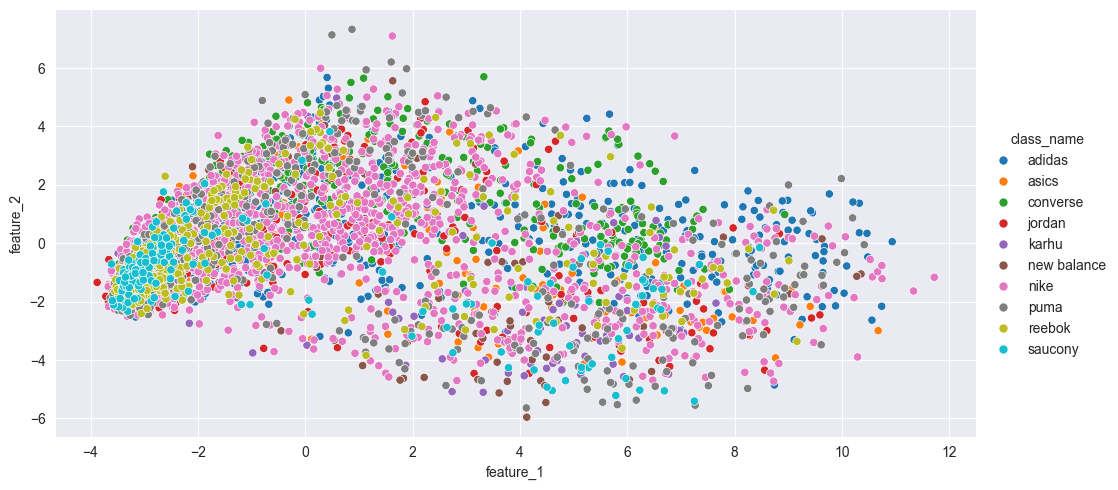

In [6]:
PCA_2 = PCA(n_components=2).fit_transform(features)
df = create_dataset(PCA_2, classes_idx, idx_to_class)
sns.relplot(data=df, x="feature_1", y="feature_2", hue="class_name", aspect=2)

# TSNE до двух компонент

/home/seara/.pyenv/versions/3.9.16/envs/DS/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


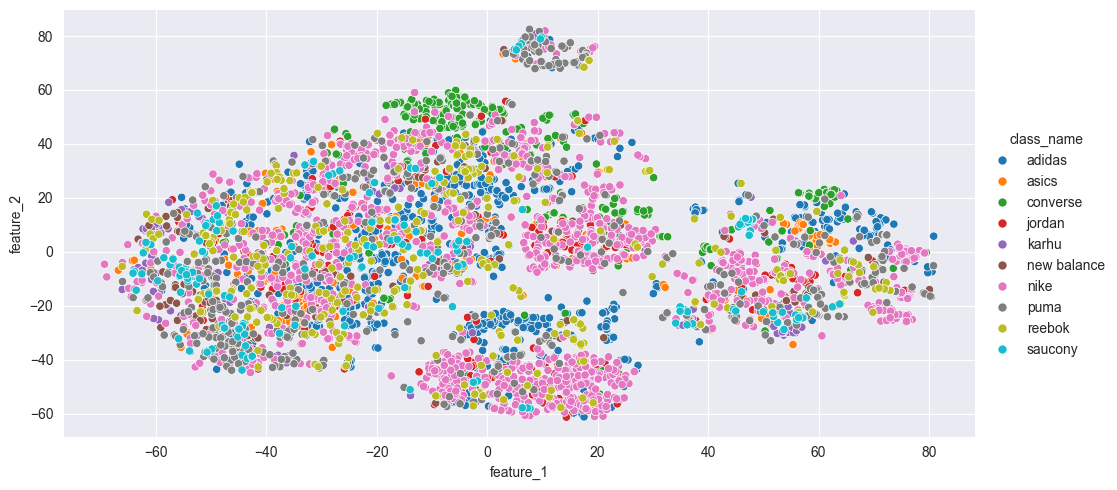

In [7]:
PCA_50 = PCA(n_components=50).fit_transform(features)
TSNE_2 = TSNE(n_components=2).fit_transform(PCA_50)
df = create_dataset(TSNE_2, classes_idx, idx_to_class)
sns.relplot(data=df, x="feature_1", y="feature_2", hue="class_name", aspect=2)